In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df= pd.read_csv('IMDb Movies India.csv' , encoding='ISO-8859-1')
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [11]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [13]:
df.shape

(15509, 10)

In [14]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [19]:
df.duplicated().sum()

6

In [20]:
df.dropna(inplace=True)

In [21]:
df.duplicated().sum()

0

In [22]:
df = df.drop(['Actor 2', 'Actor 3'], axis=1)
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave
...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar


In [20]:
print(df[['Rating', 'Votes']].dtypes)


Rating    float64
Votes      object
dtype: object


In [21]:
print(df['Rating'].unique())
print(df['Votes'].unique())


[ nan  7.   4.4  4.7  7.4  5.6  4.   6.2  5.9  6.5  5.7  6.3  7.2  6.6
  7.3  7.1  6.9  3.5  5.   4.5  6.4  4.1  4.8  8.1  5.5  6.8  6.1  7.7
  5.1  7.6  3.1  3.3  7.8  8.4  5.2  4.3  5.8  4.6  7.5  6.7  3.6  3.9
  5.4  4.2  5.3  3.4  3.   8.   6.   3.8  7.9  2.7  4.9  2.4  3.7  3.2
  2.5  2.8  2.6  2.9  8.2  8.7  8.3  9.3  8.8  2.1  2.3  8.5  8.6  9.
  9.6  1.7  9.1  2.   1.4  8.9  1.9  9.4  9.7  1.8  9.2  1.6 10.   2.2
  1.1]
[nan '8' '35' ... '70,344' '408' '1,496']


In [22]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')


In [23]:
df = df.dropna(subset=['Rating', 'Votes'])


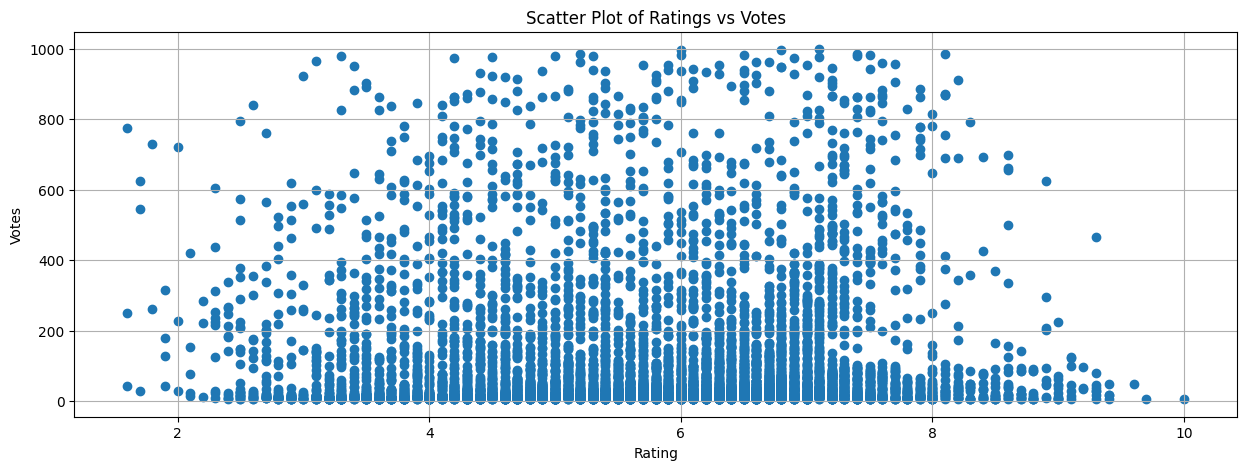

In [24]:
plt.figure(figsize=(15, 5))
plt.scatter(df['Rating'], df['Votes'])
plt.title('Scatter Plot of Ratings vs Votes')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.grid(True)
plt.show()


In [25]:
max_rating = df['Rating'].max()
max_rating_rows = df[df['Rating'] == max_rating]
print(max_rating_rows)


                 Name    Year Duration           Genre  Rating  Votes  \
8339  Love Qubool Hai  (2020)   94 min  Drama, Romance    10.0    5.0   

             Director    Actor 1         Actor 2              Actor 3  
8339  Saif Ali Sayeed  Ahaan Jha  Mahesh Narayan  Rajasree Rajakumari  


In [27]:
print(max_rating_rows[[ 'Rating', 'Votes']])  


      Rating  Votes
8339    10.0    5.0


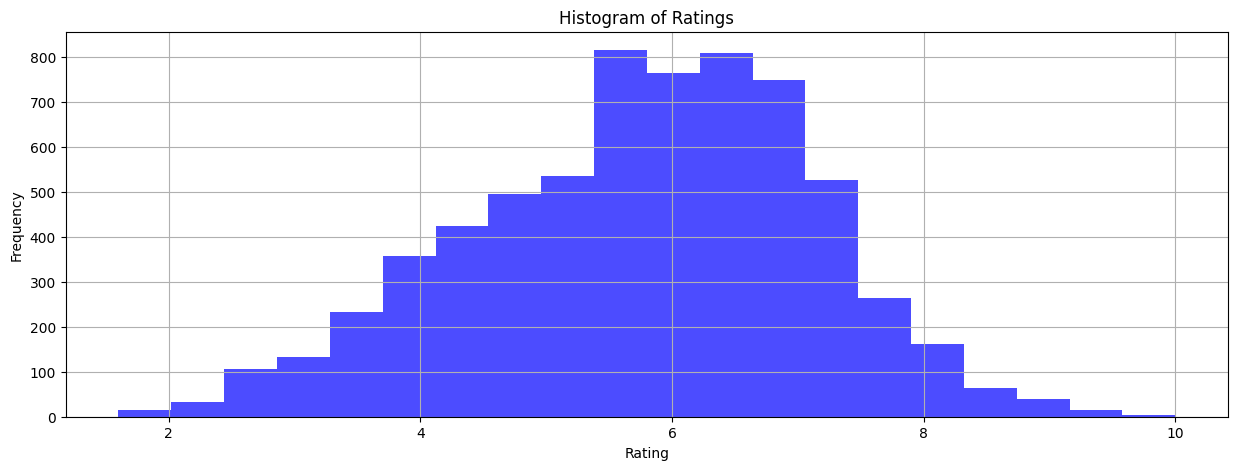

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.hist(df['Rating'], bins=20, color='blue', alpha=0.7)   
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_13136\3279571303.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.index, y=top_actors.values, palette='viridis')


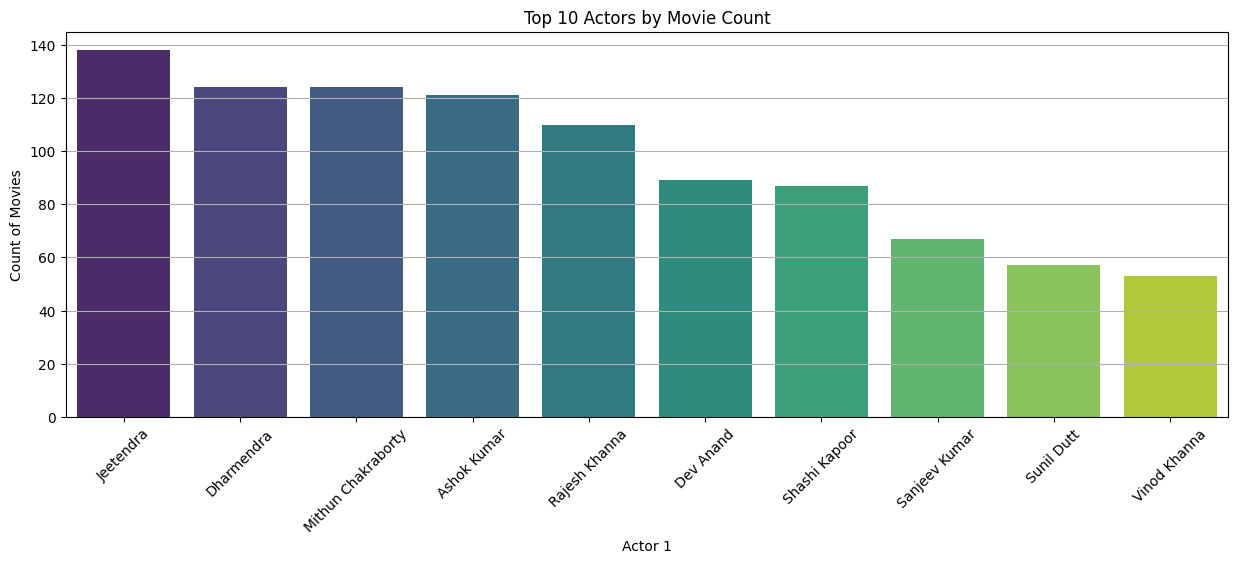

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
actor_counts = df['Actor 1'].value_counts()
top_n = 10   
top_actors = actor_counts.head(top_n)
plt.figure(figsize=(15, 5))
sns.barplot(x=top_actors.index, y=top_actors.values, palette='viridis')
plt.title(f'Top {top_n} Actors by Movie Count')
plt.xlabel('Actor 1')
plt.ylabel('Count of Movies')
plt.xticks(rotation=45)   
plt.grid(axis='y')
plt.show()



Missing values in Actor 1: 125
Missing values in Rating: 0


C:\Users\pc\AppData\Local\Temp\ipykernel_13136\3099479910.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Actor 1', y='Rating', data=df[df['Actor 1'].isin(top_actors)], palette='viridis')


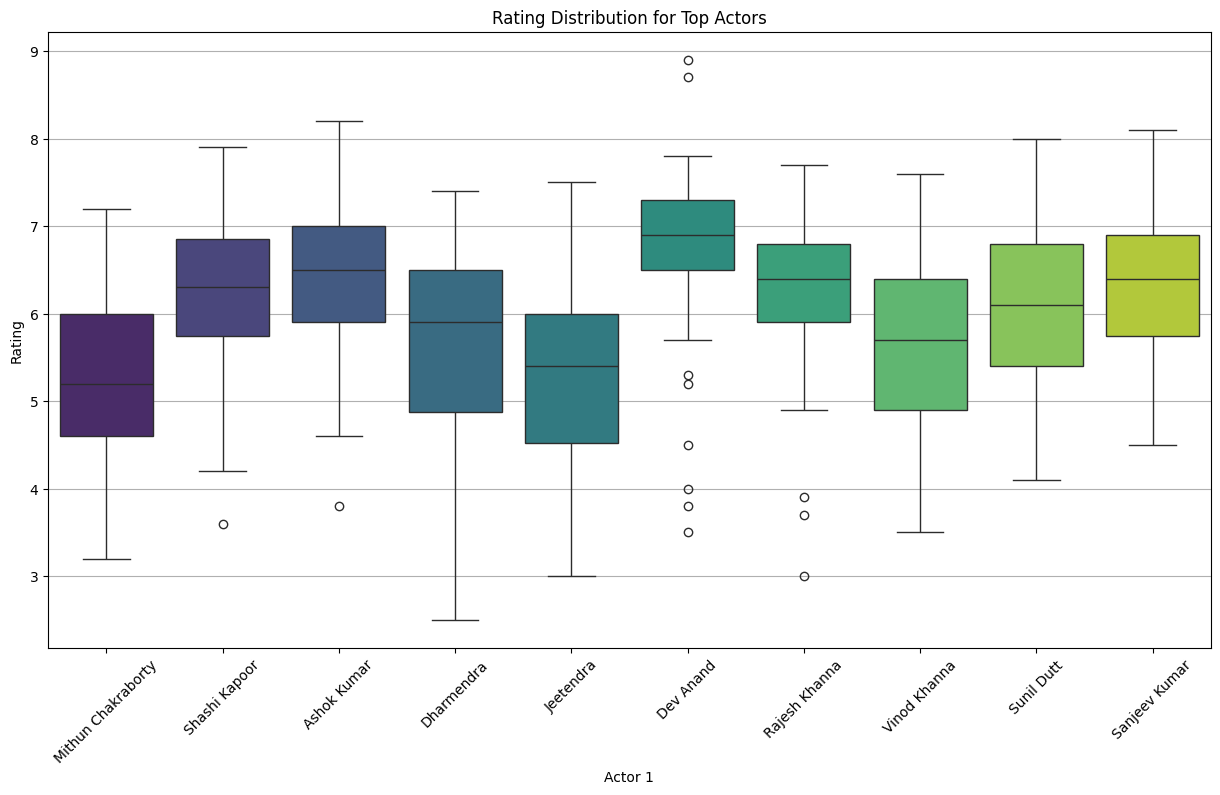

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print("Missing values in Actor 1:", df['Actor 1'].isnull().sum())
print("Missing values in Rating:", df['Rating'].isnull().sum())
top_n = 10  
top_actors = df['Actor 1'].value_counts().head(top_n).index
plt.figure(figsize=(15, 8))
sns.boxplot(x='Actor 1', y='Rating', data=df[df['Actor 1'].isin(top_actors)], palette='viridis')
plt.title('Rating Distribution for Top Actors')
plt.xlabel('Actor 1')
plt.ylabel('Rating')
plt.xticks(rotation=45)  
plt.grid(axis='y')
plt.show()


Missing values in Actor 1: 125
Missing values in Genre: 102


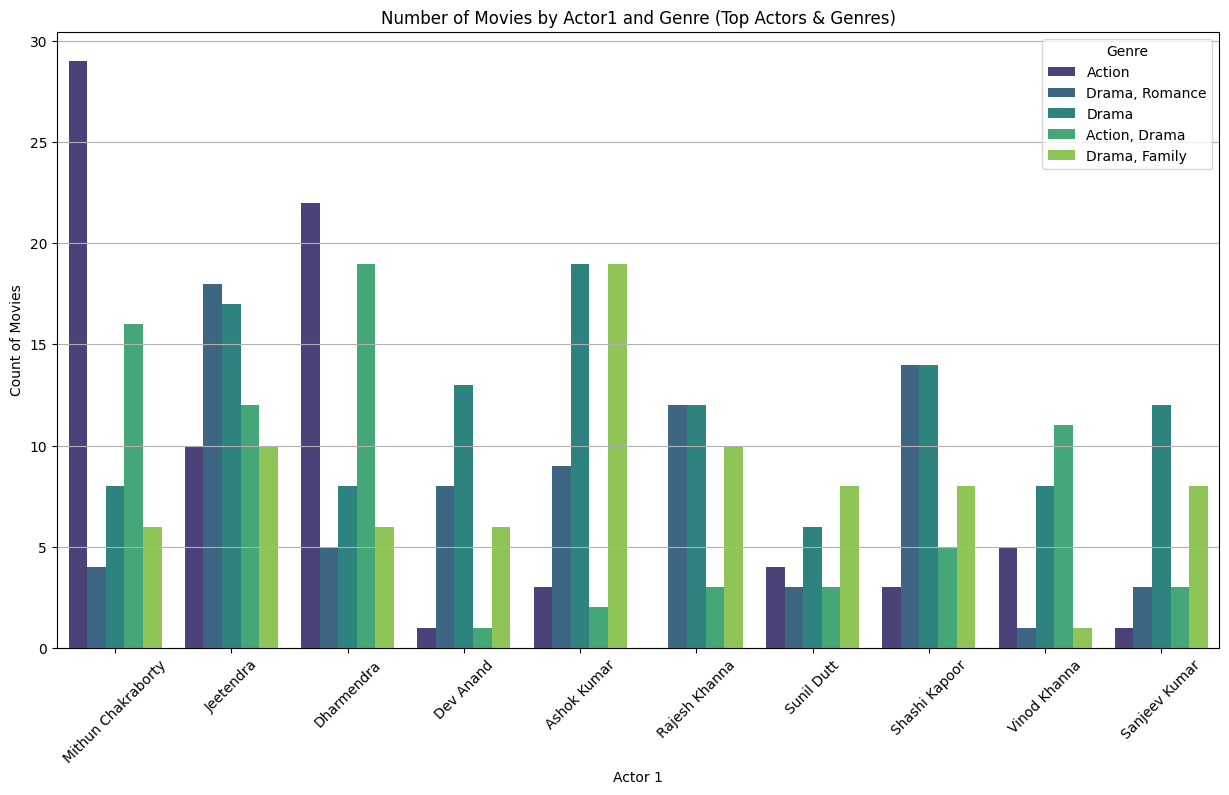

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print("Missing values in Actor 1:", df['Actor 1'].isnull().sum())
print("Missing values in Genre:", df['Genre'].isnull().sum())
top_n_actors = 10
top_n_genres = 5
top_actors = df['Actor 1'].value_counts().head(top_n_actors).index
filtered_df = df[df['Actor 1'].isin(top_actors)]
top_genres = filtered_df['Genre'].value_counts().head(top_n_genres).index
final_df = filtered_df[filtered_df['Genre'].isin(top_genres)]
plt.figure(figsize=(15, 8))
sns.countplot(data=final_df, x='Actor 1', hue='Genre', palette='viridis')
plt.title('Number of Movies by Actor1 and Genre (Top Actors & Genres)')
plt.xlabel('Actor 1')
plt.ylabel('Count of Movies')
plt.xticks(rotation=45)
plt.legend(title='Genre')
plt.grid(axis='y')
plt.show()



Missing values in Rating: 0


C:\Users\pc\AppData\Local\Temp\ipykernel_13136\466073716.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Name', data=top_films, palette='viridis')


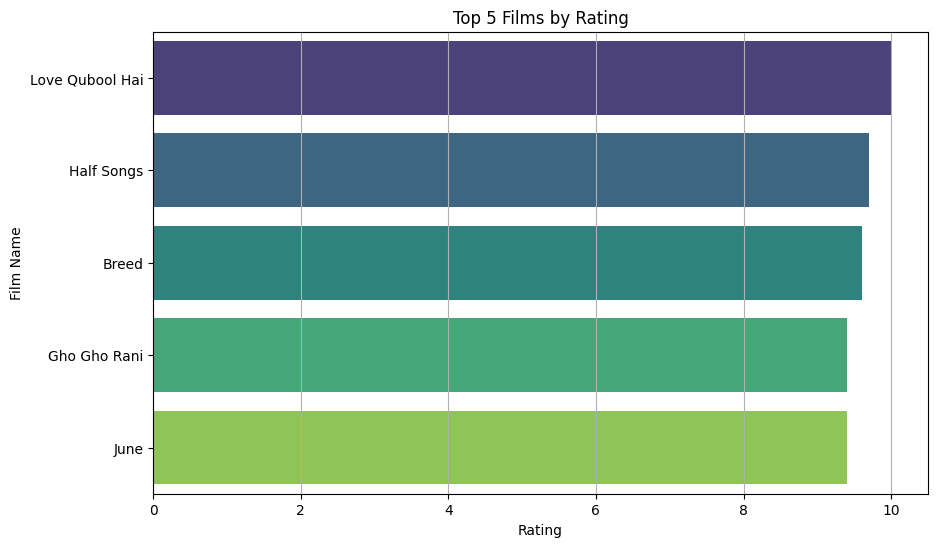

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print("Missing values in Rating:", df['Rating'].isnull().sum())
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df.dropna(subset=['Rating'])
top_films = df.nlargest(5, 'Rating')[['Name', 'Rating']]
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Name', data=top_films, palette='viridis')
plt.title('Top 5 Films by Rating')
plt.xlabel('Rating')
plt.ylabel('Film Name')
plt.grid(axis='x')
plt.show()
